# Data 515, Software Engineering for Data Scientists
## Homework 1

M.S. Data Science, University of Washington, Spr. 2019

Francisco Javier Salido Magos

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
bikeCounts = pd.read_csv('Fremont_Bdg_Bike_Counts.csv')

In [2]:
bikeCounts['Total'] = bikeCounts['Fremont Bridge East Sidewalk'] + bikeCounts['Fremont Bridge West Sidewalk']
bikeCounts['Hour'] = pd.DatetimeIndex(bikeCounts['Date']).hour
bikeCounts['Year'] = pd.DatetimeIndex(bikeCounts['Date']).year
bikeCounts.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour,Year
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0,23,2019
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0,22,2019
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0,21,2019
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0,20,2019
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0,19,2019


In [3]:
bikeCounts2016 = bikeCounts[bikeCounts['Year'] == 2016]
bikeCounts2016.reset_index(drop = True, inplace = True)
bikeCounts2016.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour,Year
0,12/31/2016 11:00:00 PM,4.0,4.0,8.0,23,2016
1,12/31/2016 10:00:00 PM,7.0,8.0,15.0,22,2016
2,12/31/2016 09:00:00 PM,4.0,6.0,10.0,21,2016
3,12/31/2016 08:00:00 PM,3.0,6.0,9.0,20,2016
4,12/31/2016 07:00:00 PM,6.0,4.0,10.0,19,2016


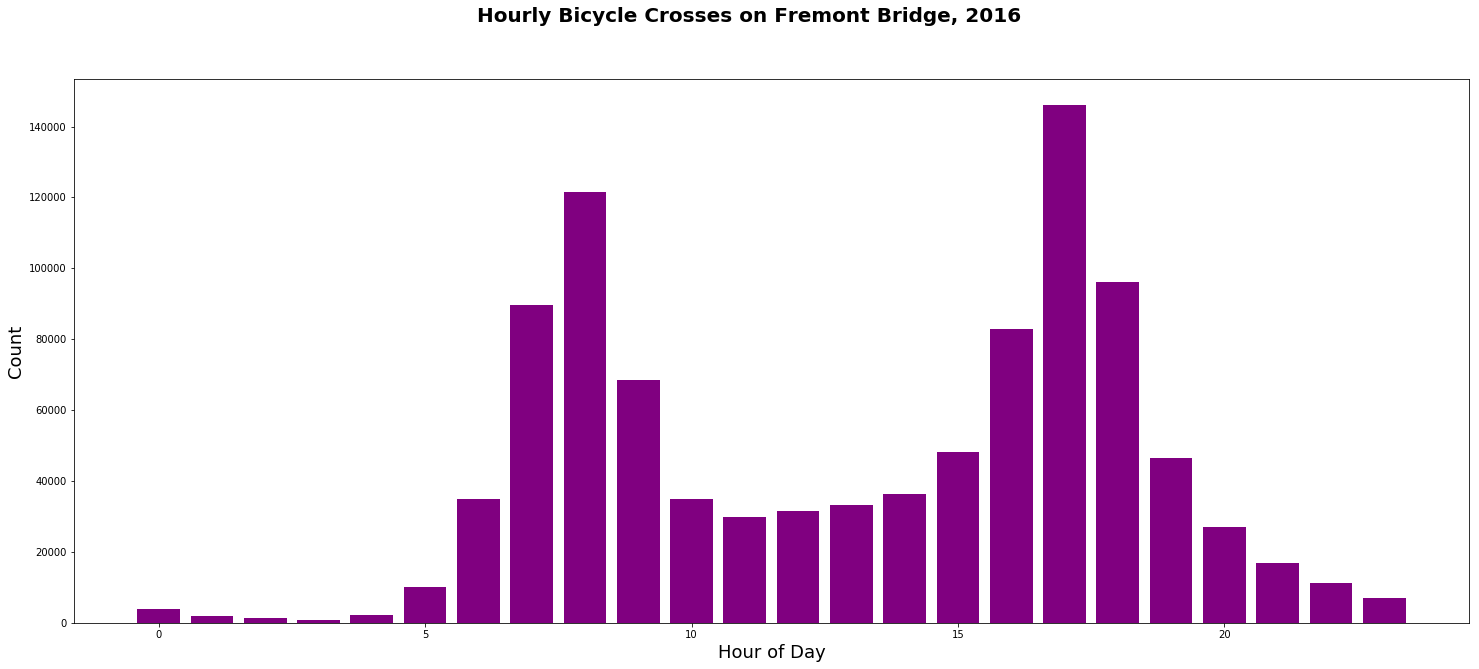

In [4]:
totalByHour = bikeCounts2016[['Total','Hour']].groupby(['Hour']).sum()
t = list(range(24))
plt.rcParams['figure.figsize'] = [25,10]
fig = plt.figure()
fig.suptitle('Hourly Bicycle Crosses on Fremont Bridge, 2016',fontsize=20,fontweight='bold')
plt.bar(t,totalByHour['Total'],color='purple')
plt.xlabel('Hour of Day',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.show()

In [5]:
hourlyAvgs = (totalByHour/bikeCounts2016[['Total','Hour']].groupby(['Hour']).count())
print('The busiest time of day are%3.0f:00 hours, with an average of %3.2f crossings.' % (hourlyAvgs.idxmax(), hourlyAvgs.max()))

The busiest time of day are 17:00 hours, with an average of 399.03 crossings.


In [ ]:
totalByHour